In [8]:
import sys
import os
# Add project directory to Python path
sys.path.append(r'F:\FYP_DATA\ml_project')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Load data
data_path = '../data/processed/process.csv'
if not os.path.exists(data_path):
    print(f'Relative path {data_path} not found, using absolute path')
    data_path = r'F:\FYP_DATA\ml_project\data\processed\process.csv'
    if not os.path.exists(data_path):
        raise FileNotFoundError(f'Data file not found at {data_path}')
df = pd.read_csv(data_path)
X = df.drop(columns=['Unnamed: 0', 'water_Discharge'], axis=1)
y = df['water_Discharge']



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=160, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_of_rdf = rf_model.predict(X_test)


mse_of_rdf= mean_squared_error(y_test, y_pred_of_rdf)
r2_of_rdf= r2_score(y_test, y_pred_of_rdf)
print(f'Mean Squared Error: {mse_of_rdf}')
print(f'R-squared Score: {r2_of_rdf}')

Mean Squared Error: 114656.60760473768
R-squared Score: 0.7576446532369271


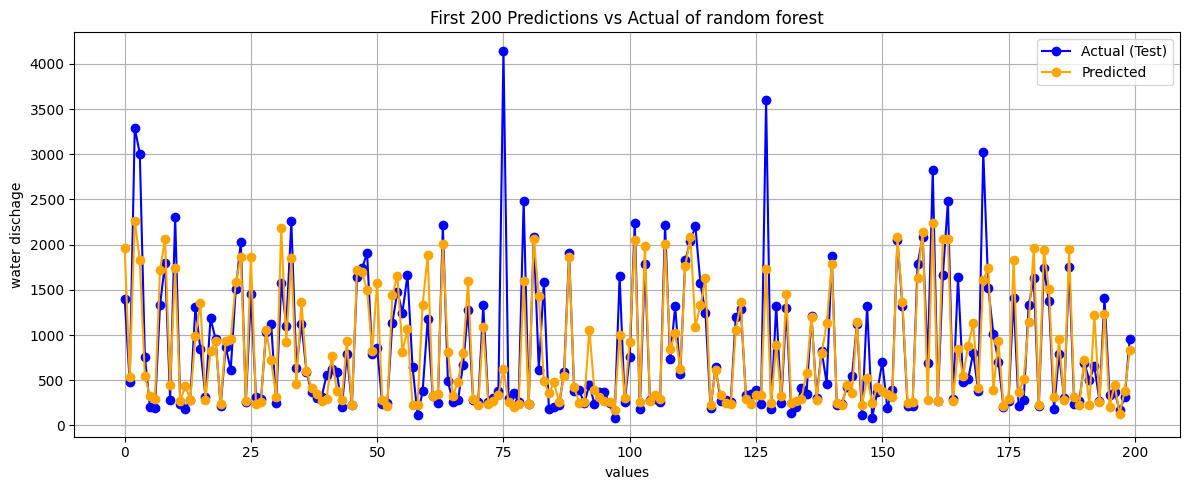

In [10]:
# Slice first 200 values
y_test_subset = y_test.values[:200]
y_pred_subset = y_pred_of_rdf[:200]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_subset, label='Actual (Test)', color='blue',marker='o')
plt.plot(y_pred_subset, label='Predicted', color='orange',marker='o')
plt.title("First 200 Predictions vs Actual of random forest")
plt.xlabel("values")
plt.ylabel("water dischage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../result/plots_of_actu_vs_pred/rdf.png")
plt.show()

In [13]:
## XGBoost Regressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import joblib
from sklearn.model_selection import GridSearchCV
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 160],
    'max_depth': [2, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_regressor, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_



# Load them back

# Predictions
y_pred_of_xgb= best_model.predict(X_test_scaled)

# Evaluate model
mse_of_xgb= mean_squared_error(y_test, y_pred_of_xgb)
r2_of_xgb = r2_score(y_test, y_pred_of_xgb)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse_of_xgb}")
print(f"R-squared Score: {r2_of_xgb}")


joblib.dump((best_model), "scaler_model.pkl")



Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error: 110749.98479366512
R-squared Score: 0.7659022752425767


['scaler_model.pkl']

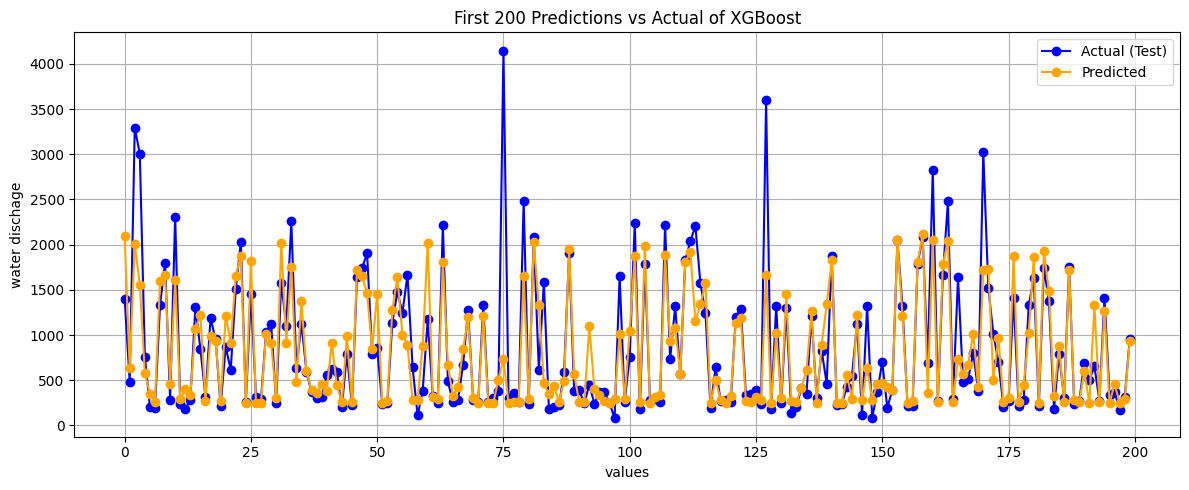

In [ ]:
# Slice first 200 values
y_test_subset = y_test.values[:200]
y_pred_subset = y_pred_of_xgb[:200]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_subset, label='Actual (Test)', color='blue',marker='o')
plt.plot(y_pred_subset, label='Predicted', color='orange',marker='o')
plt.title("First 200 Predictions vs Actual of XGBoost")
plt.xlabel("values")
plt.ylabel("water dischage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../result/plots_of_actu_vs_pred/xgboost.png")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=3)

# Transform the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model=LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions
y_pred_of_reg = model.predict(X_test_poly)

# Evaluate the model
mse_of_reg=mean_squared_error(y_test, y_pred_of_reg)
rmse_of_reg=np.sqrt(mean_squared_error(y_test, y_pred_of_reg))
r2_of_reg= r2_score(y_test, y_pred_of_reg)
print(f'mse of the regression:{mse_of_reg}')
print(f'r2_of_regression:{r2_of_reg}')

mse of the regression:126624.35873839524
r2_of_regression:0.7323478252863687


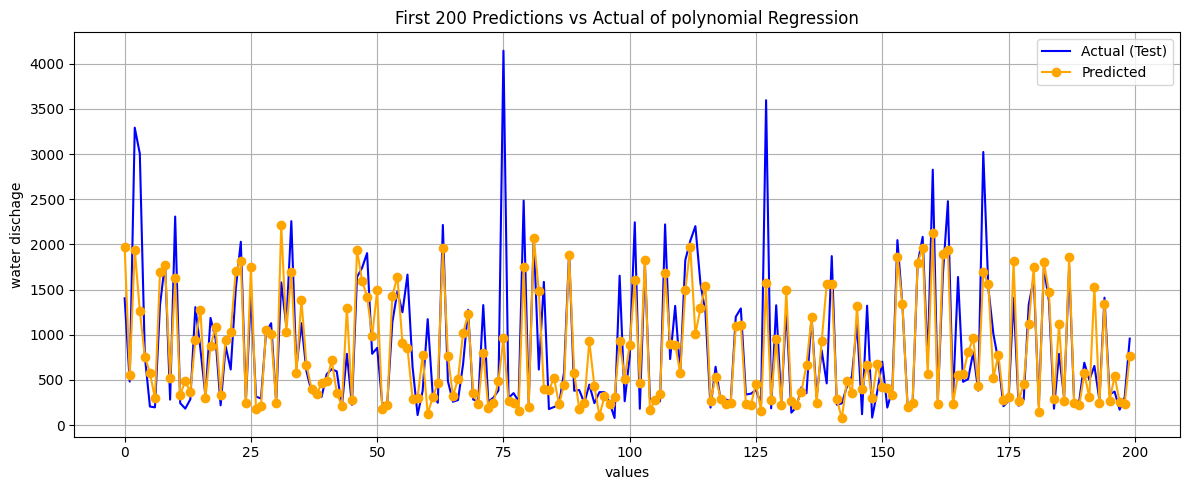

In [ ]:
# Slice first 200 values
y_test_subset = y_test.values[:200]
y_pred_subset = y_pred_of_reg[:200]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_subset, label='Actual (Test)', color='blue',marker='')
plt.plot(y_pred_subset, label='Predicted', color='orange',marker='o')
plt.title("First 200 Predictions vs Actual of polynomial Regression")
plt.xlabel("values")
plt.ylabel("water dischage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../result/plots_of_actu_vs_pred/regress.png")
plt.show()

In [ ]:
## Support Vector Machine
from sklearn.svm import SVR

# Train an SVM with RBF kernel using GridSearchCV for best parameters
param_grid = {
    'C': [1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'epsilon': [0.1, 0.5, 1]  # Epsilon in the loss function
}

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=6, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svr = grid_search.best_estimator_

# Make predictions
y_pred_of_svr = best_svr.predict(X_test_scaled)

mse_of_svr=mean_squared_error(y_test, y_pred_of_svr)
rmse_of_svr=np.sqrt(mean_squared_error(y_test, y_pred_of_svr))
r2_of_svr= r2_score(y_test, y_pred_of_svr)
print(f'mse_of_svr:{mse_of_svr}')
print(f'r2_fo svr: {r2_of_svr}')

mse_of_svr:132180.51353598386
r2_fo svr: 0.7206035058723408


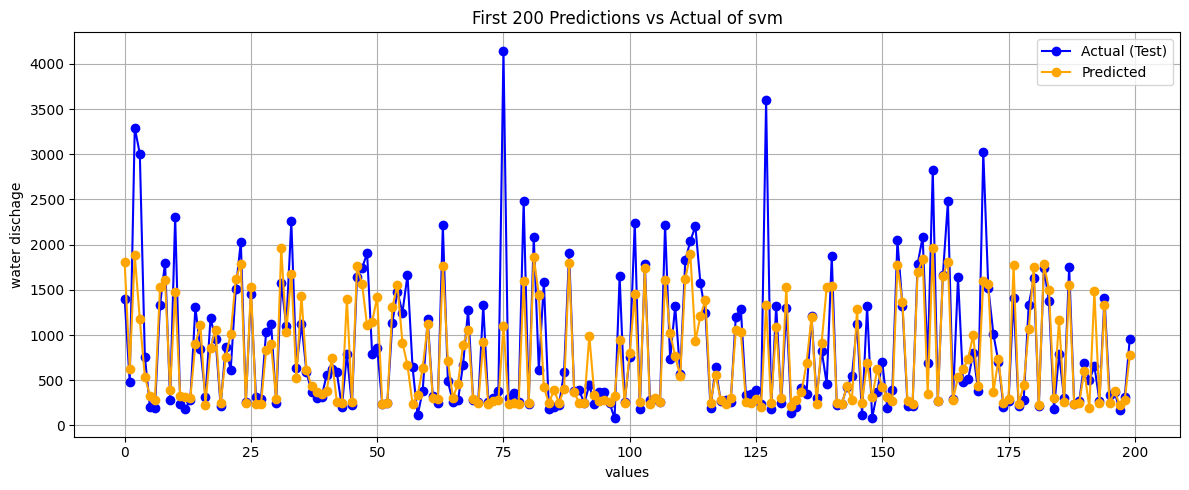

In [ ]:

## Slice first 200 values
y_test_subset = y_test.values[:200]
y_pred_subset = y_pred_of_svr[:200]
# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_subset, label='Actual (Test)', color='blue',marker='o')
plt.plot(y_pred_subset, label='Predicted', color='orange',marker='o')
plt.title("First 200 Predictions vs Actual of svm")
plt.xlabel("values")
plt.ylabel("water dischage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../result/plots_of_actu_vs_pred/svr.png")
plt.show()


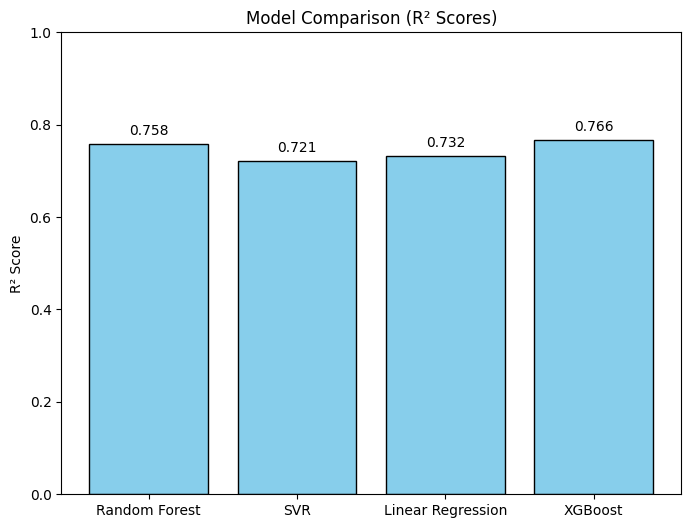

In [ ]:
# R2 scores from your models
r2_scores = {
    "Random Forest": r2_of_rdf,
    "SVR": r2_of_svr,
    "Linear Regression": r2_of_reg,
    "XGBoost": r2_of_xgb
}

# Plot bar chart
plt.figure(figsize=(8,6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue', edgecolor='black')
plt.ylabel("R² Score")
plt.title("Model Comparison (R² Scores)")
plt.ylim(0, 1)  # R² score is usually between 0 and 1, but can go negative too

# Add values on top of bars
for i, (model, score) in enumerate(r2_scores.items()):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center')
plt.savefig("../result/r2_models_plot/r2_modelsplot.png")
plt.show()


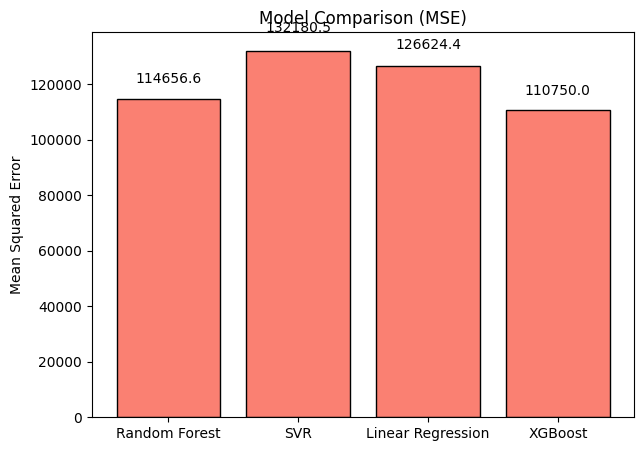

In [ ]:
# MSE Scores
mse_scores = {
    "Random Forest": mse_of_rdf,
    "SVR": mse_of_svr,
    "Linear Regression": mse_of_reg,
    "XGBoost": mse_of_xgb
}

plt.figure(figsize=(7,5))
plt.bar(mse_scores.keys(), mse_scores.values(), color='salmon', edgecolor='black')
plt.title("Model Comparison (MSE)")
plt.ylabel("Mean Squared Error")
for i, (model, score) in enumerate(mse_scores.items()):
    plt.text(i, score + (0.05*score), f"{score:.1f}", ha='center')
plt.savefig("../result/rmse_models_plot/rmse_modelsplot.png")
plt.show()


In [ ]:

# Create DataFrame
df_results = pd.DataFrame({
    "Actual": y_test,
    "RandomForest_Pred": y_pred_of_rdf,
    "LinearRegression_Pred": y_pred_of_reg,
    "XGBoost_Pred": y_pred_of_xgb,
    "SVR_Pred": y_pred_of_svr
})

# Show first 10 rows
data_of_predicted=df_results.head(20)


In [ ]:
data_of_predicted.to_excel('../result/predicted.xlsx',index=False)